
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

---

In [1]:


import pandas as pd

In [2]:
s_p_500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies") 
sp500_table = s_p_500[0]
sp500_table_interest = sp500_table[["Symbol", "Security", "GICS Sector","Date added"]]
symbols_and_dates = sp500_table[['Symbol','Date added']].copy()
#get the number of stocks added each year
symbols_and_dates['Date added'] = pd.to_datetime(symbols_and_dates['Date added'])
symbols_and_dates['Year'] = symbols_and_dates['Date added'].dt.year
added_per_year = symbols_and_dates.groupby('Year').size().reset_index(name='Count')
added_per_year = added_per_year.sort_values(by='Count', ascending=False)


In [3]:

added_per_year

,Year,Count
0,1957,53
48,2017,23
47,2016,23
50,2019,22
39,2008,17
55,2024,16
53,2022,16
54,2023,15
52,2021,15
49,2018,14


In [4]:
#Additional: How many current S&P 500 stocks have been in the index for more than 20 years? 
# When stocks are added to the S&P 500,
# they usually experience a price bump as investors and index funds buy shares following the announcement.
current_date = pd.to_datetime('today')
long_term_stocks = symbols_and_dates[symbols_and_dates['Date added'] <= current_date - pd.Timedelta(days=365*20)]
long_term_count = long_term_stocks['Symbol'].nunique()
print(long_term_count)
long_term_stocks[['Symbol', 'Date added']].head(10)  # Displaying the first 10 long-term stocks

219


,Symbol,Date added
0,MMM,1957-03-04
2,ABT,1957-03-04
5,ADBE,1997-05-05
7,AES,1998-10-02
8,AFL,1999-05-28
9,A,2000-06-05
10,APD,1985-04-30
18,ALL,1995-07-13
21,MO,1957-03-04
24,AEE,1991-09-19



### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)


In [5]:
import yfinance as yf
major_stock_list = ['^GSPC', '000001.SS','^HSI', '^AXJO', '^NSEI', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^MXX','^BVSP']
start_date = '2025-01-01'
end_date = '2025-05-01'
difference = pd.to_datetime(end_date) - pd.to_datetime(start_date)
data = pd.DataFrame()
for stock in major_stock_list:
    try:
        ticker = yf.Ticker(stock)
        df = ticker.history(period='1d', start=start_date, end=end_date)
        df['Symbol'] = stock
        df_filtered = df[df['Symbol'] == stock]
        df_filtered['ytd_change'] = (df_filtered['Close'].iloc[-1]/df_filtered['Close'] - 1)
        df_filtered['ytd_change'] = df_filtered['ytd_change'].fillna(0)  # Fill NaN values with 0
        df.loc[df_filtered.index, 'ytd_change'] = df_filtered['ytd_change']
        df = df.reset_index()
        data = pd.concat([data, df], ignore_index=True, axis=0)
    except Exception as e:
        print(f"Error downloading {stock}: {e}")


In [6]:
# 1. Group data by Symbol to work with each index separately
# 2. Get first and last trading day for each index
# 3. Calculate proper YTD returns

# First, let's create a function to calculate YTD returns
def calculate_ytd_returns(df_group):
    # Sort by date to ensure first is earliest and last is latest
    df_sorted = df_group.sort_values('Date')
    # Get first and last close price
    first_price = df_sorted['Close'].iloc[0]
    last_price = df_sorted['Close'].iloc[-1]
    # Calculate return
    ytd_return = (last_price / first_price) - 1
    return pd.Series({'ytd_return': ytd_return, })

# Apply the function to each group of Symbol
ytd_returns = data.groupby('Symbol').apply(calculate_ytd_returns).reset_index()

# Identify the S&P 500 return
sp500_return = ytd_returns[ytd_returns['Symbol'] == '^GSPC']['ytd_return'].values[0]

# Compare other indices to S&P 500
better_than_sp500 = ytd_returns[ytd_returns['ytd_return'] > sp500_return]

# Count how many are better (excluding S&P 500 itself)
num_better = len(better_than_sp500[better_than_sp500['Symbol'] != '^GSPC'])

print(f"Number of indices with better YTD returns than S&P 500: {num_better}")
print("\nYTD Returns for all indices (sorted):")
print(ytd_returns.sort_values('ytd_return', ascending=False))

Number of indices with better YTD returns than S&P 500: 9

YTD Returns for all indices (sorted):
       Symbol  ytd_return
8        ^MXX    0.130494
7        ^HSI    0.127200
2       ^BVSP    0.124387
4      ^GDAXI    0.123464
3       ^FTSE    0.028426
10      ^NSEI    0.024904
0   000001.SS    0.005048
6     ^GSPTSE   -0.002261
1       ^AXJO   -0.009145
5       ^GSPC   -0.051033
9       ^N225   -0.082979


/var/folders/n2/mxpcpf2j7h93lmtvkb88_9wr0000gp/T/ipykernel_29664/663818407.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ytd_returns = data.groupby('Symbol').apply(calculate_ytd_returns).reset_index()


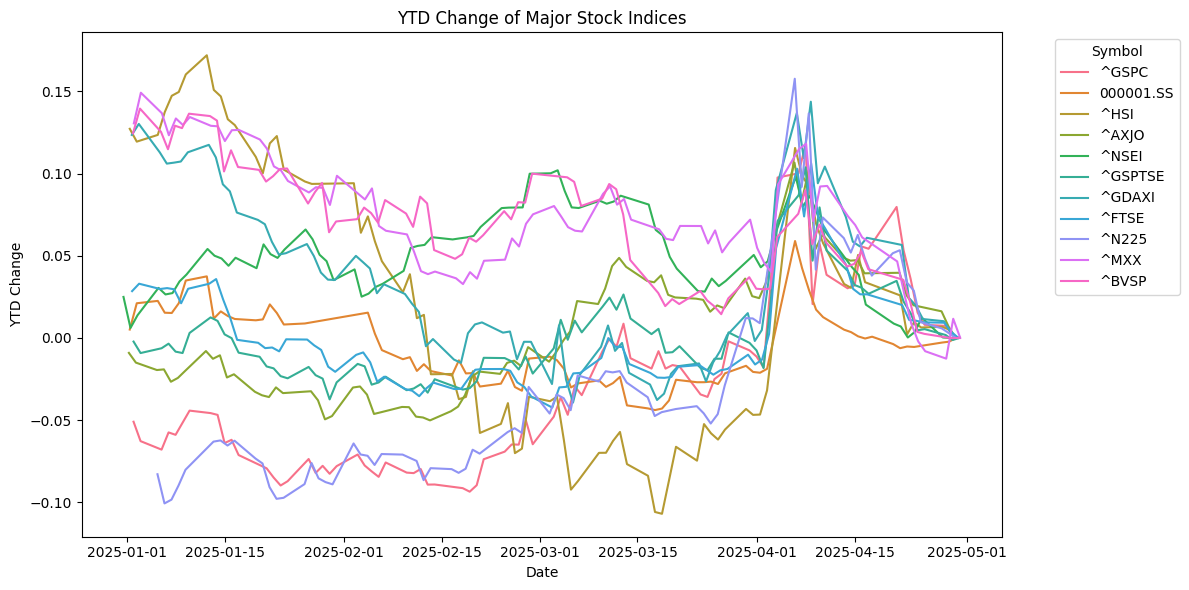

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='ytd_change', hue='Symbol')
plt.title('YTD Change of Major Stock Indices')
plt.xlabel('Date')
plt.ylabel('YTD Change')
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

In [8]:
# Get historical data
sp500 = yf.download('^GSPC', start='1950-01-01')['Close']

# Identify correction periods
all_time_highs = sp500.cummax()
sp500['Is_ATH'] = (sp500 == all_time_highs)
ath_dates = sp500.index[sp500['Is_ATH']].tolist()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:

corrections = []

for i in range(len(ath_dates)-1):
    start = ath_dates[i]
    end = ath_dates[i+1]
    high = all_time_highs.loc[ath_dates[i]].iloc[0]
    low = sp500.loc[start:end].min().iloc[0]
    
    # Calculate drawdown
    drawdown = (high - low)/high * 100
    if isinstance(drawdown, pd.Series):
        drawdown = drawdown.iloc[0]  # Handle series conversion
    
    if drawdown >= 5:
        min_date = sp500.loc[start:end].idxmin().iloc[0]
        duration = (min_date - start).days
        corrections.append({
            'Start Date': start.strftime('%Y-%m-%d'),
            'End Date': min_date.strftime('%Y-%m-%d'),
            'Duration (Days)': duration,
            'Drawdown %': round(drawdown, 1)
        })

# Create formatted dataframe
corrections_df = pd.DataFrame(corrections)
print(corrections_df.head(10))
corrections_df.sort_values(by='Drawdown %', ascending=False)


   Start Date    End Date  Duration (Days)  Drawdown %
0  1950-06-12  1950-07-17               35        14.0
1  1950-11-24  1950-12-04               10         6.5
2  1951-05-03  1951-06-29               57         8.1
3  1951-10-15  1951-11-23               39         6.1
4  1952-01-22  1952-02-20               29         6.4
5  1952-08-08  1952-10-22               75         6.8
6  1953-01-05  1953-09-14              252        14.8
7  1955-01-03  1955-01-17               14         5.9
8  1955-03-04  1955-03-14               10         6.8
9  1955-09-23  1955-10-11               18        10.6


,Start Date,End Date,Duration (Days),Drawdown %
56,2007-10-09,2009-03-09,517,56.8
54,2000-03-24,2002-10-09,929,49.1
24,1973-01-11,1974-10-03,630,48.2
22,1968-11-29,1970-05-26,543,36.1
65,2020-02-19,2020-03-23,33,33.9
...,...,...,...,...
25,1980-09-22,1980-09-29,7,5.3
67,2021-09-02,2021-10-04,32,5.2
23,1972-08-14,1972-10-16,63,5.1
50,1999-04-12,1999-04-19,7,5.1


In [10]:
print(corrections_df['Duration (Days)'].describe(percentiles=[.25, .5, .75]))


count     71.000000
mean     113.098592
std      179.073341
min        7.000000
25%       21.500000
50%       39.000000
75%       89.000000
max      929.000000
Name: Duration (Days), dtype: float64


Text(0.5, 1.0, 'Distribution of Correction Durations')

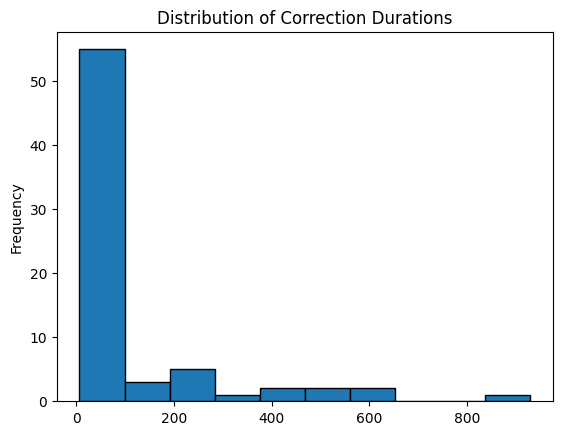

In [11]:
corrections_df['Duration (Days)'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Correction Durations')


### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS"). Both fields should be present in the file. You should obtain 36 data points for use in the descriptive analysis (median) later.  
5. Calculate 2-day percentage changes following positive earnings surprises
6. Compare the median 2-day percentage change for positive surprises vs. all historical dates

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)


In [26]:
# Load and clean earnings data
earnings = pd.read_csv('../../data/raw_data/ha1_Amazon.csv', sep=';').iloc[:-1, :]  # Exclude the last row which is a summary row
earnings['Earnings Date'] = pd.to_datetime(earnings['Earnings Date'].str.split(' at').str[0], errors='coerce')

# Clean numeric columns
numeric_cols = ['EPS Estimate', 'Reported EPS', 'Surprise (%)']
for col in numeric_cols:
    earnings[col] = pd.to_numeric(earnings[col].str.replace('[^-.0-9]', '', regex=True), errors='coerce')

# Download historical prices
amzn = yf.download('AMZN', start='1997-05-15')['Close'].reset_index()
amzn.columns = ['Date', 'Price']

# Calculate 2-day returns for ALL dates
amzn['2_day_pct_change'] =((amzn['Price'].shift(-2) / amzn['Price']) - 1)

positive_surprises = earnings[
    ((~earnings['Reported EPS'].isna()) &
    (~earnings['EPS Estimate'].isna())) &
    ((earnings['Reported EPS'] > earnings['EPS Estimate']))
].copy()
#

dates_to_consider = positive_surprises['Earnings Date'].tolist()
# Filter AMZN data for the dates of interest
amzn_filtered = amzn[amzn['Date'].isin(dates_to_consider)].copy()

#( amzn_filtered['Price'].shift(-2)/amzn_filtered['Price'] -1).median()
amzn_filtered['2_day_pct_change'].median()*100

[*********************100%***********************]  1 of 1 completed


np.float64(1.9883346562319937)

In [28]:
len(positive_surprises)

36

In [30]:
# Merge earnings dates with price data
merged = pd.merge_asof(
    earnings.sort_values('Earnings Date'),
    amzn.sort_values('Date'),
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Filter positive earnings surprises
positive_surprises = merged[
    ((merged['Reported EPS'] > merged['EPS Estimate']))&
    (merged['2_day_pct_change'].notna() & merged['Reported EPS'].notna() & merged['EPS Estimate'].notna())
].copy()

# Calculate median 2-day percentage changes
median_positive = positive_surprises['2_day_pct_change'].median()
median_all = amzn['2_day_pct_change'].median()

median_positive, median_all

(np.float64(0.019883346562319937), np.float64(0.001645667580093324))

In [31]:
merged = pd.merge_asof(
    earnings.sort_values('Earnings Date'),
    amzn.sort_values('Date'),
    left_on='Earnings Date',
    right_on='Date',
    direction='forward',
    tolerance=pd.Timedelta('2D')
)
positive_surprises = merged[
    ((merged['Reported EPS'] > merged['EPS Estimate']) | 
    (merged['Surprise (%)'] > 0)) &
    (merged['2_day_pct_change'].notna() & merged['Reported EPS'].notna() & merged['EPS Estimate'].notna())
]

# Calculate comparison metrics
all_days_median = amzn['2_day_pct_change'].median()*100
positive_surprises_median = positive_surprises['2_day_pct_change'].median()*100

print(f"Median 2-day return after positive surprises: {positive_surprises_median:.2%}")
print(f"Median 2-day return for all trading days: {all_days_median:.2%}")

# Optional: Display key examples
print("\nNotable examples:")
print(positive_surprises[['Earnings Date', 'Surprise (%)', '2_day_pct_change']].head(10))


Median 2-day return after positive surprises: -17.28%
Median 2-day return for all trading days: 16.46%

Notable examples:
   Earnings Date  Surprise (%)  2_day_pct_change
7     1999-04-28         19.92         -0.110788
8     1999-07-21          0.47         -0.086697
9     1999-10-27          7.54         -0.069959
11    2000-04-26          3.79          0.031542
12    2000-07-26          6.20         -0.168111
13    2000-10-24         12.95          0.247357
14    2001-01-30          2.57         -0.141914
15    2001-04-24         17.39         -0.015944
16    2001-07-23         27.14         -0.281971
17    2001-10-23          0.25         -0.186387



### Question 5.  [Exploratory, optional] Brainstorm potential idea for your capstone project

**Free text answer**

Describe the capstone project you would like to pursue, considering your aspirations, ML model predictions, and prior knowledge. Even if you are unsure at this stage, try to generate an idea you would like to explore-such as a specific asset class, country, industry vertical, or investment strategy. Be as specific as possible.

*Example: I want to build a short-term prediction model for the US/India/Brazil stock markets, focusing on the largest stocks over a 30-day investment horizon. I plan to use RSI and MACD technical indicators and news coverage data to generate predictions.*


**Answer:**
For my capstone project, I would like to develop a mid-term prediction model for equity markets in both Latin America (specifically Colombia, Brazil, Mexico,Chile, Peru, starting with colombia) and the United States. My focus will be on forecasting stock returns or index levels over (Somethign related with energy or tech) a six-month investment horizon. I am interested in combining traditional technical indicators with macroeconomic variables, particularly each country’s data to improve predictive power.

My goal is to investigate how the interplay between technical signals and local macroeconomic conditions affects market performance, and whether machine learning models can capture these relationships for more robust investment strategies. As a physicist with no formal background in economics, I am motivated to bridge my quantitative skills with financial knowledge, and I look forward to learning more about macroeconomic indicators and their impact on asset prices as I progress through the project.

Potential challenges include sourcing reliable macroeconomic and market data for Latin American countries and interpreting the economic context behind the numbers. However, I believe this interdisciplinary approach could yield valuable insights for investors interested in emerging markets and global diversification.


### Question 6. [Exploratory, optional] Investigate new metrics

**Free text answer**

Using the data sources we have covered (or any others you find relevant), download and explore a few additional metrics or time series that could be valuable for your project. Briefly explain why you think each metric is useful. This does not need to be a comprehensive list-focus on demonstrating your ability to generate data requests based on your project description, identify and locate the necessary data, and explain how you would retrieve it using Python.

1. Global Multi-Market Coverage

| Source         | Key Features                                                                | Why Valuable                                                                     | Link                                           |
|----------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------|------------------------------------------------|
| Alpa Vantage   | 150+ global exchanges, real-time/historical data, technical indicators      | Single API for equities/forex/commodities. Offers 25+ years of historical data   | [link](https://www.alphavantage.co/)           |
| Twelve Data    | 100+ exchanges, 50+ technical indicators, WebSocket streaming               | Unified API structure for global markets. Institutional-grade latency (170ms)    | [link](https://twelvedata.com/)                |
| Marketstack    | 30k+ tickers, EOD data from 70+ exchanges, JSON/CSV formats                 | Free tier for historical data. Supports emerging markets like Brazil/India       | [link](https://marketstack.com/)               |
| Quandl         | Alternative datasets (aviation, retail, energy) + traditional market data   | Unique datasets like Amazon purchase trends complement price analysis            | [link](https://data.nasdaq.com/publishers/QDL) |


# Case Colombia
|Company Name                                  | Sector                        | API Data Source (with API access) |
|----------------------------------------------|-------------------------------|-----------------------------------|
|Ecopetrol                                     | Energy (Oil & Gas)            | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html), [Investing.com API](https://www.investing.com/stock-screener/colombia/energy/oil-and-gas) |
|Canacol Energy                                | Energy (Oil & Gas)            | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html), [Investing.com API](https://www.investing.com/stock-screener/colombia/energy/oil-and-gas) |
|Organización Terpel                           | Energy (Oil & Gas)            | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html), [Investing.com API](https://www.investing.com/stock-screener/colombia/energy/oil-and-gas) |
|ISA (Interconexión Eléctrica)                 | Energy (Utilities)            | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html) |
|Celsia                                        | Energy (Utilities/Renewables) | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html) |
|ETB (Empresa de Telecomunicaciones de Bogotá) | Technology (Telecom)          | [MILA API](https://jespinel.com/an-api-to-provide-mila-stock-data.html) |


In [15]:
# get colombian data
# Fetch Colombian stock data
tickers = ["EC", "GEB.CL", "ENELAM.SN","CELSIA.CL"] #Ecopetrol, Grupo Energía Bogotá, Enel latam
data = yf.download(tickers, start="2020-01-01", end="2025-05-30")
data

[*********************100%***********************]  4 of 4 completed


Price             Close                                             High  \
Ticker        CELSIA.CL         EC   ENELAM.SN       GEB.CL    CELSIA.CL   
Date                                                                       
2020-01-01  3192.644287        NaN         NaN  1244.800659  3192.644287   
2020-01-02  3192.644287  11.264085  168.967697  1244.800659  3192.644287   
2020-01-03  3250.560303  11.358370  169.967484  1247.603882  3250.560303   
2020-01-06  3250.560303  11.314002  169.967484  1247.603882  3250.560303   
2020-01-07  3243.320801  11.369461  169.967484  1258.818726  3243.320801   
...                 ...        ...         ...          ...          ...   
2025-05-23  4410.000000   8.610000   95.996208  2970.000000  4415.000000   
2025-05-26  4395.000000        NaN   92.959999  2945.000000  4410.000000   
2025-05-27  4390.000000   8.700000   92.129997  2915.000000  4400.000000   
2025-05-28  4300.000000   8.620000   92.120003  2950.000000  4390.000000   
2025-05-29  4400.000000   8.720000   92.150002  2985.000000  4400.000000   

Price                                                   Low             \
Ticker             EC   ENELAM.SN       GEB.CL    CELSIA.CL         EC   
Date                                                                     
2020-01-01        NaN         NaN  1244.800659  3192.644287        NaN   
2020-01-02  11.319546  168.967697  1244.800659  3192.644287  11.175348   
2020-01-03  11.480384  170.637354  1247.603882  3250.560303  11.291817   
2020-01-06  11.386102  170.097464  1247.603882  3250.560303  11.247450   
2020-01-07  11.413830  170.957300  1264.425936  3228.841690  11.241902   
...               ...         ...          ...          ...        ...   
2025-05-23   8.610000   95.996208  2970.000000  4320.000000   8.380000   
2025-05-26        NaN   96.000000  2975.000000  4390.000000        NaN   
2025-05-27   8.750000   93.500000  2945.000000  4360.000000   8.610000   
2025-05-28   8.750000   93.949997  2960.000000  4300.000000   8.570000   
2025-05-29   8.730000   92.970001  2985.000000  4325.000000   8.600000   

Price                                       Open                         \
Ticker       ENELAM.SN       GEB.CL    CELSIA.CL         EC   ENELAM.SN   
Date                                                                      
2020-01-01         NaN  1244.800659  3192.644287        NaN         NaN   
2020-01-02  165.968271  1244.800659  3192.644287  11.175348  168.967697   
2020-01-03  166.968057  1241.996673  3250.560303  11.419377  169.967484   
2020-01-06  166.968057  1247.603882  3250.560303  11.369463  169.967484   
2020-01-07  169.227620  1241.997095  3243.320801  11.269631  169.967484   
...                ...          ...          ...        ...         ...   
2025-05-23   95.156245  2930.000000  4310.000000   8.380000   96.496188   
2025-05-26   92.160004  2945.000000  4410.000000        NaN   95.440002   
2025-05-27   92.129997  2875.000000  4395.000000   8.620000   92.959999   
2025-05-28   92.010002  2910.000000  4390.000000   8.750000   92.129997   
2025-05-29   91.699997  2940.000000  4300.000000   8.680000   92.000000   

Price                      Volume                                   
Ticker           GEB.CL CELSIA.CL         EC   ENELAM.SN    GEB.CL  
Date                                                                
2020-01-01  1244.800659       0.0        NaN         NaN       0.0  
2020-01-02  1244.800659       0.0   264900.0   8257292.0       0.0  
2020-01-03  1247.603882   18024.0   682700.0  17007804.0  183165.0  
2020-01-06  1247.603882       0.0   397200.0  16194441.0       0.0  
2020-01-07  1258.818726   63027.0   559200.0  11190242.0  526079.0  
...                 ...       ...        ...         ...       ...  
2025-05-23  2970.000000  208621.0  1255600.0  50277786.0  397508.0  
2025-05-26  2970.000000   87520.0        NaN  45338249.0  101462.0  
2025-05-27  2945.000000  202697.0  1697700.0  23304469.0  839402.0  
2025-05-28  2915.00

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'USD to COP Exchange Rate (2020-2025)'}, xlabel='Date'>

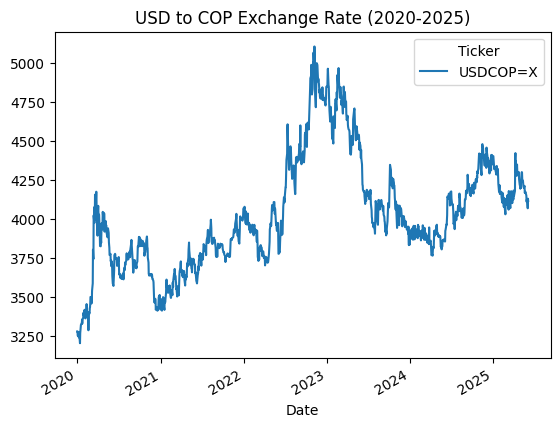

In [16]:
dollar_cop = yf.download("USDCOP=X", start="2020-01-01")['Close']
dollar_cop.name = 'USD_COP'


dollar_cop.plot(title="USD to COP Exchange Rate (2020-2025)")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Oil Price Trends (2020-2025)'}, xlabel='Date'>

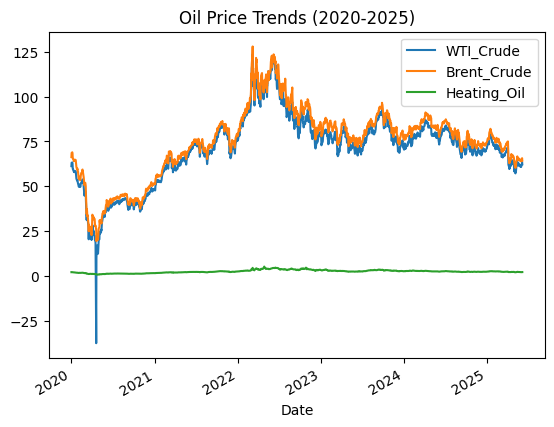

In [17]:
oil_tikers = ['CL=F', 'BZ=F', 'HO=F']  # Crude oil, Brent oil and heat oil
oil_prices = pd.DataFrame()
for ticker in oil_tikers:
    try:
        oil_data = yf.download(ticker, start="2020-01-01")['Close']
        oil_prices = pd.concat([oil_prices,oil_data], axis=1)
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")

oil_prices.columns = ['WTI_Crude', 'Brent_Crude', 'Heating_Oil']
oil_prices.plot(title="Oil Price Trends (2020-2025)")

In [18]:
oil_prices['Heating_Oil']

Date
2020-01-02    2.0241
2020-01-03    2.0614
2020-01-06    2.0339
2020-01-07    2.0324
2020-01-08    1.9582
               ...  
2025-05-29    2.0482
2025-05-30    2.0172
2025-06-02    2.0445
2025-06-03    2.0999
2025-06-04    2.0600
Name: Heating_Oil, Length: 1365, dtype: float64